In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('/content/averaged_results.xlsx')
df.head()

,Period beginning,Period ending,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),Emirates Airline Journeys (m),TfL Rail Journeys (m)
0,2010-04-01,2010-05-01,3.741935,6.583871,179.516129,15.864516,10.822581,5.693548,0.935484,101919.032258,0.0,189.1,90.5,6.3,2.3,0.0,0.0,0.0
1,2010-05-02,2010-05-29,4.535714,5.671429,193.750000,17.600000,12.303571,7.325000,0.528571,101782.857143,0.0,181.6,84.5,5.8,2.2,0.0,0.0,0.0
2,2010-05-30,2010-06-26,3.928571,6.842857,223.285714,22.753571,17.025000,11.596429,0.421429,101708.214286,0.0,175.9,84.3,5.8,2.1,0.0,0.0,0.0
3,2010-06-27,2010-07-24,3.464286,6.475000,215.678571,25.375000,20.310714,15.028571,0.585714,101590.714286,0.0,183.4,86.5,6.1,2.1,0.0,0.0,0.0
4,2010-07-25,2010-08-21,5.750000,2.982143,140.892857,22.646429,18.460714,14.125000,1.407143,101492.142857,0.0,160.4,82.9,5.8,2.0,0.0,0.0,0.0


In [ ]:
print(df.isnull().sum())

Period beginning                 0
Period ending                    0
cloud_cover                      0
sunshine                         0
global_radiation                 0
max_temp                         0
mean_temp                        0
min_temp                         0
precipitation                    0
pressure                         0
snow_depth                       0
Bus journeys (m)                 0
Underground journeys (m)         0
DLR Journeys (m)                 0
Tram Journeys (m)                0
Overground Journeys (m)          0
Emirates Airline Journeys (m)    0
TfL Rail Journeys (m)            0
dtype: int64


Total TFL uses:  [297.1930448  250.49749423 289.23708548 256.69380157 280.33529782
 275.26204112 262.73584652 270.48075392 281.05761408 319.08212607
 309.22769381 317.50824625 282.44141053 258.98307109 289.10309646
 264.60603551 265.5526368  317.00840343 307.63977645 258.82245884
 292.52974423 308.36887655 296.8943866  264.55731562 274.07643147
 273.70936371 263.64261977 289.89682569]
Mean Absolute Error: 31.914539277036475
R2 Score: -0.40254129867317046


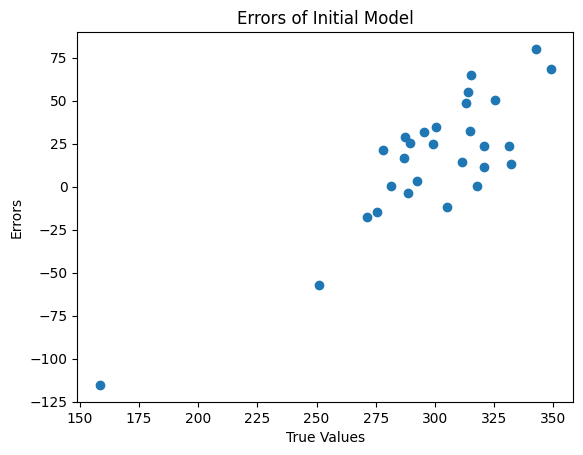

Mean Absolute Error (Percentage): 10.68%
Mean Squared Error (Percentage): 1.93%
R-squared (Percentage): -40.25%
Model and scaler saved as ridge_regression_model.pkl and scaler.pkl
Model and scaler loaded successfully


In [ ]:
weather_features = [
    'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
    'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'
]
target_columns = [
    'Bus journeys (m)', 'Underground journeys (m)', 'DLR Journeys (m)',
    'Tram Journeys (m)', 'Overground Journeys (m)',
    'Emirates Airline Journeys (m)', 'TfL Rail Journeys (m)'
]
df['total_ridership'] = df[target_columns].sum(axis=1)

X = df[weather_features]
y = df['total_ridership']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training with Ridge Regression
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
print('Total TFL uses: ', y_pred)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

plt.scatter(y_test, y_test - y_pred)
plt.xlabel('True Values')
plt.ylabel('Errors')
plt.title('Errors of Initial Model')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mean of the actual values
y_mean = y_test.mean()

# Convert to percentages
mae_percentage = (mae / y_mean) * 100
mse_percentage = (mse / y_mean**2) * 100
r2_percentage = r2 * 100

print(f'Mean Absolute Error (Percentage): {mae_percentage:.2f}%')
print(f'Mean Squared Error (Percentage): {mse_percentage:.2f}%')
print(f'R-squared (Percentage): {r2_percentage:.2f}%')

# Define file paths
model_filename = 'ridge_regression_model.pkl'
scaler_filename = 'scaler.pkl'

# Save the model
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the scaler
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print(f'Model and scaler saved as {model_filename} and {scaler_filename}')

# Load the model
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load the scaler
with open(scaler_filename, 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

print('Model and scaler loaded successfully')


# Cross-Validation

# cv_scores = cross_val_score(Ridge(alpha=1.0), X_scaled, y, cv=95, scoring='neg_mean_absolute_error')
# print('Cross-Validated MAE:', -cv_scores.mean())

# # Lasso

# from sklearn.linear_model import Lasso

# lasso_model = Lasso(alpha=0.1)
# lasso_model.fit(X_train, y_train)
# y_pred_lasso = lasso_model.predict(X_test)
# print('Lasso MAE:', mean_absolute_error(y_test, y_pred_lasso))
# print('Lasso R2 Score:', r2_score(y_test, y_pred_lasso))

# # Random Forest

# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor

# # Example for Random Forest
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10]
# }

# grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# print('Best Parameters:', grid_search.best_params_)

# best_rf_model = grid_search.best_estimator_
# y_pred_best_rf = best_rf_model.predict(X_test)
# print('Best Random Forest MAE:', mean_absolute_error(y_test, y_pred_best_rf))
# print('Best Random Forest R2 Score:', r2_score(y_test, y_pred_best_rf))

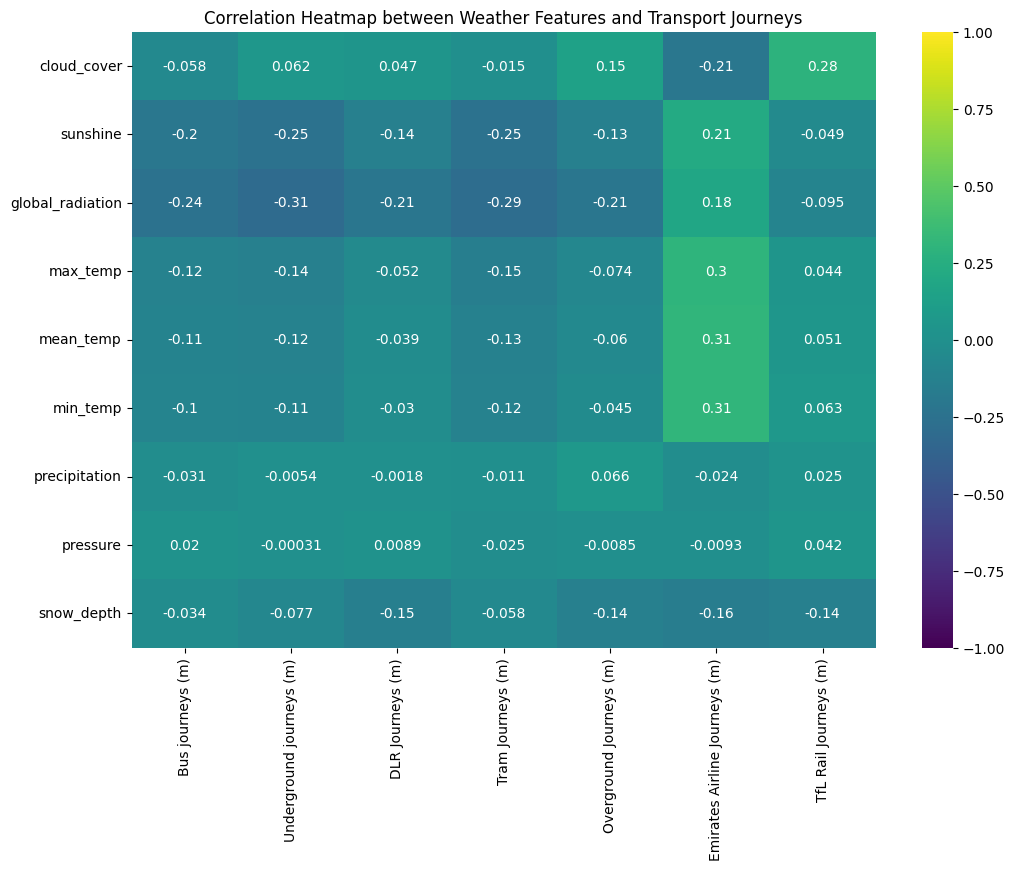

In [ ]:


# Select only the relevant columns for correlation
df_subset = df[weather_features + target_columns]

# Compute the correlation matrix
correlation_matrix = df_subset.corr()

# Extract the correlation subset between weather features and transport journeys
correlation_subset = correlation_matrix.loc[weather_features, target_columns]

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(correlation_subset, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Weather Features and Transport Journeys')
plt.show()


In [ ]:
df.head()

,Period beginning,Period ending,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),Emirates Airline Journeys (m),TfL Rail Journeys (m),total_ridership
0,2010-04-01,2010-05-01,3.741935,6.583871,179.516129,15.864516,10.822581,5.693548,0.935484,101919.032258,0.0,189.1,90.5,6.3,2.3,0.0,0.0,0.0,288.2
1,2010-05-02,2010-05-29,4.535714,5.671429,193.750000,17.600000,12.303571,7.325000,0.528571,101782.857143,0.0,181.6,84.5,5.8,2.2,0.0,0.0,0.0,274.1
2,2010-05-30,2010-06-26,3.928571,6.842857,223.285714,22.753571,17.025000,11.596429,0.421429,101708.214286,0.0,175.9,84.3,5.8,2.1,0.0,0.0,0.0,268.1
3,2010-06-27,2010-07-24,3.464286,6.475000,215.678571,25.375000,20.310714,15.028571,0.585714,101590.714286,0.0,183.4,86.5,6.1,2.1,0.0,0.0,0.0,278.1
4,2010-07-25,2010-08-21,5.750000,2.982143,140.892857,22.646429,18.460714,14.125000,1.407143,101492.142857,0.0,160.4,82.9,5.8,2.0,0.0,0.0,0.0,251.1
